# Comparative Plots for Firm Time Series

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from matplotlib.lines import Line2D
import ipynb.fs.defs.Functions_Equilibria_Along_Parameters as sliceFuncs
import ipynb.fs.defs.Functions_Equations_Equilibrium_Simulation as baseFuncs

### Run Simulation

In [3]:
t_span = 400
para = baseFuncs.paraReset()
generalAlloc = False  #False runs the behavior version 
para['gamma_c'] = 0.5
para['gamma_p'] = 0.5
R_us1, R_os1, w_As1, w_Ds1, Us1, _, timesteps1 = baseFuncs.simulate(para, tau = t_span, T = t_span, generalAlloc = generalAlloc)

para = baseFuncs.paraReset() #reset parameters
para['gamma_c'] = 0.9
para['gamma_p'] = 0.5
para['dtilde'] = 0.5
R_us2, R_os2, w_As2, w_Ds2, Us2, _, timesteps2 = baseFuncs.simulate(para, tau = t_span, T = t_span, generalAlloc = generalAlloc)

### Comparative Plots

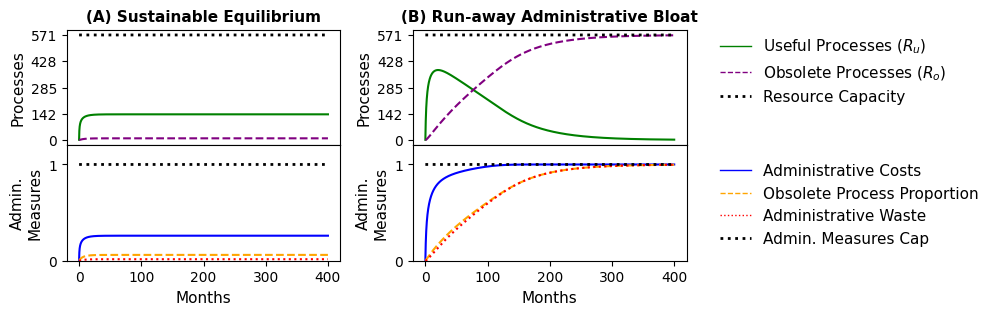

In [5]:
# Plot stuff
saveFig = True
fig, axs = plt.subplots(2, 2, sharex=True, constrained_layout = False, figsize = (8,3))
label_fs = 11  # Label font size for y axes
other_fs = 11

# Creating final arrays needed for plot
R_s1 = np.asarray(R_us1)+np.asarray(R_os1)
R_s2 = np.asarray(R_us2)+np.asarray(R_os2)
R_max = np.ones(len(R_us1))*para['w_max']/para['k_A']
R_max_val = int(para['w_max']/para['k_A'])
prop_R_o1 = np.asarray(R_os1)/np.asarray(R_s1)
prop_w_A1 = np.asarray(w_As1)/(np.ones(np.asarray(w_As1).shape)*para['w_max'])
admin_waste1 = prop_R_o1*prop_w_A1
prop_R_o2 = np.asarray(R_os2)/np.asarray(R_s2)
prop_w_A2 = np.asarray(w_As2)/(np.ones(np.asarray(w_As2).shape)*para['w_max'])
admin_waste2 = prop_R_o2*prop_w_A2


# Determining the upper bound for the utility plots' y axis
u_max = max(max(Us1), max(Us2))



# PLOTTING

# LEFT COLUMN
axs[0,0].set_title("(A) Sustainable Equilibrium", fontsize = other_fs, fontweight = "bold")

axs[0,0].set_ylabel('Processes', fontsize = label_fs)
axs[0,0].plot(timesteps1, R_us1, color = 'green')
axs[0,0].plot(timesteps1, R_os1, color = 'purple', linestyle = "--")
axs[0,0].plot(timesteps1, R_max, color = 'black', linestyle = ":", linewidth = 2)

axs[1,0].set_ylabel('Admin.\nMeasures', fontsize = label_fs)
axs[1,0].set_xlabel('Months', fontsize = label_fs)
axs[1,0].plot(timesteps1, prop_w_A1, color = 'blue')
axs[1,0].plot(timesteps1, prop_R_o1, color = 'orange', linestyle = "--")
axs[1,0].plot(timesteps1, admin_waste1, color = 'red', linestyle = ":")
axs[1,0].plot(timesteps1, np.ones(len(timesteps1)), color = 'black', linestyle = ":", linewidth = 2)
axs[1,0].set_ylim(0,1.20)

# Axis Ticks and Labels:
axs[0,0].get_yaxis().set_ticks([0, int(R_max_val/4), int(R_max_val/2), int(3*R_max_val/4), R_max_val])
axs[1,0].get_yaxis().set_ticks([0,1])

#RIGHT COLUMN
axs[0,1].set_title("(B) Run-away Administrative Bloat", fontsize = other_fs, fontweight = "bold")

axs[0,1].set_ylabel('Processes', fontsize = label_fs)
axs[0,1].plot(timesteps2, R_us2, color = 'green')
axs[0,1].plot(timesteps2, R_os2, color = 'purple', linestyle = "--")
axs[0,1].plot(timesteps2, R_max, color = 'black', linestyle = ":", linewidth = 2)

axs[1,1].set_ylabel('Admin.\nMeasures', fontsize = label_fs)
axs[1,1].set_xlabel('Months', fontsize = label_fs)
axs[1,1].plot(timesteps2, prop_w_A2, color = 'blue')
axs[1,1].plot(timesteps2, prop_R_o2, color = 'orange', linestyle = "--")
axs[1,1].plot(timesteps2, admin_waste2, color = 'red', linestyle = ":")

axs[1,1].plot(timesteps1, np.ones(len(timesteps1)), color = 'black', linestyle = ":", linewidth = 2)
axs[1,1].set_ylim(0,1.2)

# Y axis ticks gone
axs[0,1].get_yaxis().set_ticks([0, int(R_max_val/4), int(R_max_val/2), int(3*R_max_val/4), R_max_val])
axs[1,1].get_yaxis().set_ticks([0,1])

# Adjust spacing
fig.subplots_adjust(hspace = 0, wspace = 0.265)

# Create Legend
custom_lines = [Line2D([0], [0], color='green', lw=1), Line2D([0], [0], color='purple', linestyle = "--", lw=1), 
                Line2D([0], [0], color='black', linestyle = ":", lw=2)]
fig.legend(custom_lines, ['Useful Processes ($R_u$)', 'Obsolete Processes ($R_o$)', "Resource Capacity"], handlelength = 2, 
           bbox_to_anchor=(0.925,0.9), loc = "upper left", frameon = False, fontsize = other_fs)
custom_lines = [Line2D([0], [0], color='blue', lw=1), Line2D([0], [0], color='orange', linestyle = "--", lw=1), 
                Line2D([0], [0], color='red', linestyle = ":", lw=1), 
                Line2D([0], [0], color='black', linestyle = ":", lw=2)]
fig.legend(custom_lines, ["Administrative Costs", "Obsolete Process Proportion", "Administrative Waste", "Admin. Measures Cap"], handlelength = 2, 
           bbox_to_anchor=(0.925,0.48), loc = "upper left", frameon = False, fontsize = other_fs)

# Save Figure?
if saveFig:
    plt.savefig("Fig3_time_series.png", dpi = 200, bbox_inches = "tight")
else:
    plt.show()